<a href="https://colab.research.google.com/github/abhishek30-ml/Pneumonia-detection/blob/master/Pneumonia_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [0]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:19<00:00, 48.3MB/s]
100% 2.29G/2.29G [00:20<00:00, 123MB/s] 


In [0]:
! mkdir total 

In [0]:
! unzip chest-xray-pneumonia.zip -d total

Streaming output truncated to the last 5000 lines.
  inflating: total/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: total/chest_xray/train/NORMAL/IM-0

In [0]:
train_path = '/content/total/chest_xray/train'
test_path = '/content/total/chest_xray/test'

In [0]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                      target_size=(150,150),
                                                  batch_size=32,
                                                  color_mode='grayscale',
                                                    class_mode ='categorical')

Found 5216 images belonging to 2 classes.


In [0]:
x_batch, y_batch = next(train_dataset)

In [0]:
x_batch = np.squeeze(x_batch)

In [0]:
y_batch.shape
x_batch[1]

array([[0.30588236, 0.31764707, 0.32156864, ..., 0.4901961 , 0.47058827,
        0.454902  ],
       [0.3137255 , 0.29803923, 0.32941177, ..., 0.43137258, 0.4666667 ,
        0.4666667 ],
       [0.31764707, 0.32941177, 0.32156864, ..., 0.4431373 , 0.48235297,
        0.45882356],
       ...,
       [0.15686275, 0.23137257, 0.29803923, ..., 0.        , 0.        ,
        0.        ],
       [0.15294118, 0.24705884, 0.3137255 , ..., 0.        , 0.        ,
        0.        ],
       [0.16862746, 0.24705884, 0.32941177, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

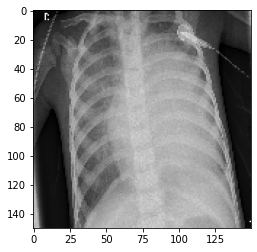

In [0]:
for i in range (0,1):
    image = x_batch[i]
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

In [0]:
from keras.layers import Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
import keras

In [0]:
model = Sequential()

model.add(Conv2D(filters= 64, padding='same', kernel_size=(11,11), input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(75, (7,7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((3,3), strides=(3,3)))

model.add(Conv2D(100, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((5,5), (5,5)))

model.add(Flatten())
model.add(Dense(75, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(25, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(2,activation='softmax'))


In [0]:
model.compile (loss = keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
model.fit(train_dataset, epochs=5)

Epoch 1/5
163/163 [==============================] - 1493s 9s/step - loss: 0.3294 - accuracy: 0.8645
Epoch 2/5
163/163 [==============================] - 1493s 9s/step - loss: 0.1367 - accuracy: 0.9471
Epoch 3/5
163/163 [==============================] - 1492s 9s/step - loss: 0.1028 - accuracy: 0.9601
Epoch 4/5
163/163 [==============================] - 1489s 9s/step - loss: 0.0737 - accuracy: 0.9724
Epoch 5/5
163/163 [==============================] - 1493s 9s/step - loss: 0.0736 - accuracy: 0.9720


In [0]:
! mkdir weights

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255,)
test_dataset = test_datagen.flow_from_directory(test_path,
                                                      target_size=(150,150),
                                                  batch_size=1,
                                                  color_mode='grayscale',
                                                    class_mode ='categorical',
                                                shuffle=False)

Found 624 images belonging to 2 classes.


In [0]:
model.evaluate_generator(test_dataset, verbose=1)

624/624 [==============================] - 61s 98ms/step


[0.1448018103837967, 0.8942307829856873]

In [0]:
cost_df = pd.DataFrame(model.history.history)

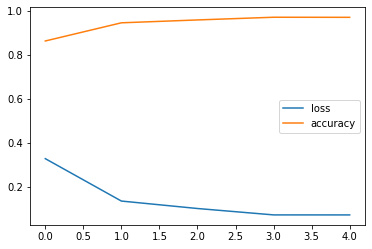

In [0]:
cost_df.plot()

In [0]:
cost_df

,loss,accuracy
0,0.329436,0.864456
1,0.136657,0.947086
2,0.102779,0.960123
3,0.073709,0.972393
4,0.073639,0.972009


In [0]:
# Clearly After 4th epoch, there is no significant variations.
# Thus we limit our epochs to epoch=4
# We have definetely overfitted our data
# So we have to use dropout function.